In [5]:
import pandas as pd
import boto3
from io import StringIO

# S3 bucket URL where the dataset is located
s3_url = 's3://fraud-detection-project-naisargi/customer_behavior_fraud_dataset.csv'

# Initialize S3 client
s3 = boto3.client('s3')

# Extract the bucket name and file name from the S3 URL
bucket_name = s3_url.split('/')[2]
file_name = '/'.join(s3_url.split('/')[3:])

# Read the CSV file from S3 directly into pandas DataFrame
obj = s3.get_object(Bucket=bucket_name, Key=file_name)
data = pd.read_csv(obj['Body'])

# Display the first few rows of the dataset to inspect it
print(data.head())


  user_id session_id transaction_id  transaction_amount  num_items  \
0   U0164      S0058         T00001               46.93          5   
1   U0036      S0378         T00002               59.03          7   
2   U0009      S0016         T00003              123.13          6   
3   U0144      S0102         T00004                0.08          4   
4   U0115      S0302         T00005               56.55          1   

  device_type geo_location           login_time     transaction_time  \
0         web      Vietnam  2025-10-11 07:14:52  2025-10-11 07:29:52   
1         web      Germany  2025-10-07 02:40:38  2025-10-07 02:51:38   
2         web        India  2025-10-19 05:58:12  2025-10-19 06:19:12   
3      tablet      Germany  2025-10-17 18:51:26  2025-10-17 19:12:26   
4      mobile          USA  2025-10-16 17:35:49  2025-10-16 18:02:49   

   time_since_last_login  avg_spend_last_30_days  num_logins_last_7_days  \
0                 175.81                  127.76                      

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values if needed (e.g., by filling or dropping them)
# Example: Filling missing values with the mean for numerical columns
data = data.fillna(data.mean())

# Inspect the columns
print(data.columns)


In [7]:
data = pd.get_dummies(data, drop_first=True)


In [9]:
# Define the features (all columns except the target)
X = data.drop(columns=['fraud_flag'])

# Define the target variable (the column we want to predict)
y = data['fraud_flag']

# Check the shapes of X and y
print("Shape of X:", X.shape)  # (num_samples, num_features)
print("Shape of y:", y.shape)  # (num_samples,)


Shape of X: (1000, 3650)
Shape of y: (1000,)


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (800, 3650)
Shape of y_train: (800,)
Shape of X_test: (200, 3650)
Shape of y_test: (200,)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       192
           1       0.00      0.00      0.00         8

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.92      0.96      0.94       200



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

In [12]:
from sklearn.metrics import classification_report

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       192
           1       0.00      0.00      0.00         8

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.92      0.96      0.94       200



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

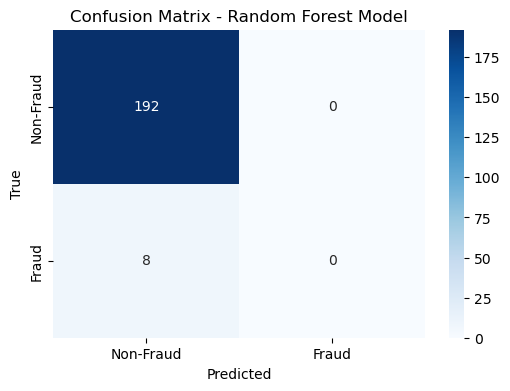

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()
